In [5]:
import pennylane as qml

n_cells = [2, 2]
hopping = 0.2
onsite = 0.3

hamiltonian = qml.spin.fermi_hubbard('square', n_cells, hopping, onsite)
print('Hamiltonian:\n')
hamiltonian

Hamiltonian:



(
    -0.1 * (Y(0) @ Z(1) @ Y(2))
  + -0.1 * (X(0) @ Z(1) @ X(2))
  + 0.3 * I([0, 1, 2, 3, 4, 5, 6, 7])
  + -0.1 * (Y(1) @ Z(2) @ Y(3))
  + -0.1 * (X(1) @ Z(2) @ X(3))
  + -0.1 * (Y(0) @ Z(1) @ Z(2) @ Z(3) @ Y(4))
  + -0.1 * (X(0) @ Z(1) @ Z(2) @ Z(3) @ X(4))
  + -0.1 * (Y(1) @ Z(2) @ Z(3) @ Z(4) @ Y(5))
  + -0.1 * (X(1) @ Z(2) @ Z(3) @ Z(4) @ X(5))
  + -0.1 * (Y(2) @ Z(3) @ Z(4) @ Z(5) @ Y(6))
  + -0.1 * (X(2) @ Z(3) @ Z(4) @ Z(5) @ X(6))
  + -0.1 * (Y(3) @ Z(4) @ Z(5) @ Z(6) @ Y(7))
  + -0.1 * (X(3) @ Z(4) @ Z(5) @ Z(6) @ X(7))
  + -0.1 * (Y(4) @ Z(5) @ Y(6))
  + -0.1 * (X(4) @ Z(5) @ X(6))
  + -0.1 * (Y(5) @ Z(6) @ Y(7))
  + -0.1 * (X(5) @ Z(6) @ X(7))
  + -0.075 * Z(1)
  + -0.075 * Z(0)
  + 0.075 * (Z(0) @ Z(1))
  + -0.075 * Z(3)
  + -0.075 * Z(2)
  + 0.075 * (Z(2) @ Z(3))
  + -0.075 * Z(5)
  + -0.075 * Z(4)
  + 0.075 * (Z(4) @ Z(5))
  + -0.075 * Z(7)
  + -0.075 * Z(6)
  + 0.075 * (Z(6) @ Z(7))
)

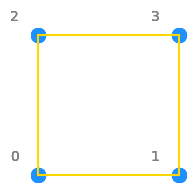

In [6]:
import matplotlib.pyplot as plt

def plot(lattice, figsize=None, showlabel=True):

    # initialize the plot
    if not figsize:
        figsize = lattice.n_cells[::-1]

    plt.figure(figsize=figsize)

    # get lattice nodes and edges and plot them
    nodes = lattice.lattice_points

    for edge in lattice.edges:
        start_index, end_index, color = edge
        start_pos, end_pos = nodes[start_index], nodes[end_index]

        x_axis = [start_pos[0], end_pos[0]]
        y_axis = [start_pos[1], end_pos[1]]
        plt.plot(x_axis, y_axis, color='gold')

        plt.scatter(nodes[:,0], nodes[:,1], color='dodgerblue', s=100)

        if showlabel:
            for index, pos in enumerate(nodes):
                plt.text(pos[0]-0.2, pos[1]+0.1, str(index), color='gray')

    plt.axis("off")
    plt.show()

lattice = qml.spin.generate_lattice('square', n_cells)
plot(lattice)

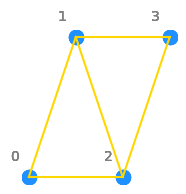

In [7]:
coupling = [0.5, 0.5, 0.5]
hamiltonian = qml.spin.heisenberg('triangle', n_cells, coupling)

lattice = qml.spin.generate_lattice('triangle', n_cells)
plot(lattice)